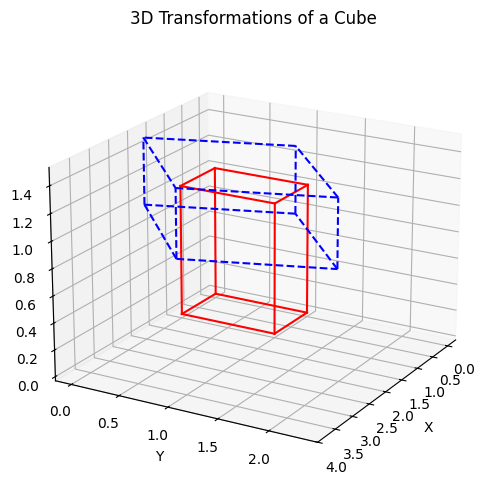

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def make_unit_cube():
    pts = np.array([
        [0, 0, 0, 1],
        [1, 0, 0, 1],
        [1, 1, 0, 1],
        [0, 1, 0, 1],
        [0, 0, 1, 1],
        [1, 0, 1, 1],
        [1, 1, 1, 1],
        [0, 1, 1, 1],
    ]).T
    return pts


def plot_cube(ax, pts, style='b-'):
    edges = [
        (0, 1), (1, 2), (2, 3), (3, 0),
        (4, 5), (5, 6), (6, 7), (7, 4),
        (0, 4), (1, 5), (2, 6), (3, 7)
    ]

    xs, ys, zs = pts[0], pts[1], pts[2]

    for i, j in edges:
        ax.plot(
            [xs[i], xs[j]],
            [ys[i], ys[j]],
            [zs[i], zs[j]],
            style
        )


def transform_points(pts, M):
    return M @ pts


def example_3d_transform():
    cube = make_unit_cube()

    # Scaling matrix
    S = np.array([
        [2, 0, 0, 0],
        [0, 1.5, 0, 0],
        [0, 0, 0.5, 0],
        [0, 0, 0, 1],
    ])

    # Translation matrix
    T = np.array([
        [1, 0, 0, 2],
        [0, 1, 0, 0],
        [0, 0, 1, 1],
        [0, 0, 0, 1],
    ])

    # Rotation about Z-axis
    theta = np.pi / 6
    Rz = np.array([
        [np.cos(theta), -np.sin(theta), 0, 0],
        [np.sin(theta), np.cos(theta), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

    # Combined transformation
    M = T @ Rz @ S

    cube_t = transform_points(cube, M)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    plot_cube(ax, cube, style='r-')
    plot_cube(ax, cube_t, style='b--')

    ax.set_title("3D Transformations of a Cube")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.view_init(elev=20, azim=30)

    plt.show()


example_3d_transform()